In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [185]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [186]:
data = pd.concat([df.Date, df.Close], axis = 1)
data.Date = pd.to_datetime(data.Date)
data = data.set_index("Date")
data = data.asfreq("D")
data = data.Close.interpolate(method = 'time')
data.head()

Date
2015-04-01 16:00:00    40.720
2015-04-02 16:00:00    40.290
2015-04-03 16:00:00    40.605
2015-04-04 16:00:00    40.920
2015-04-05 16:00:00    41.235
Freq: D, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

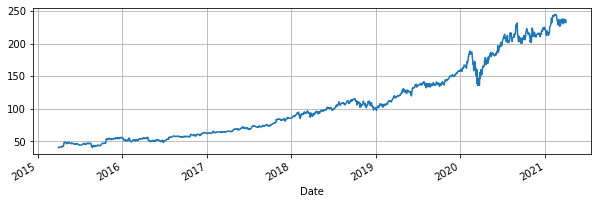

In [187]:
data.plot(grid = True, figsize = (10, 3))

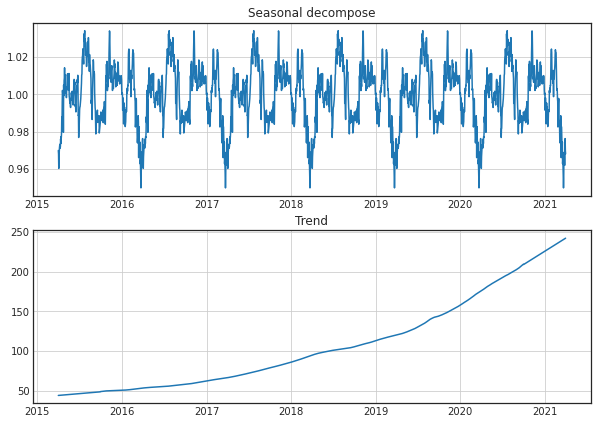

In [188]:
seasonal_dec = seasonal_decompose(data,  model='multiplicative', extrapolate_trend='freq', period = 365)

with plt.style.context('seaborn-white'):
	fig, ax = plt.subplots(2, 1, figsize = (10, 7))

	ax[0].set_title('Seasonal decompose')
	ax[0].plot(seasonal_dec.seasonal)
	ax[0].grid(True)

	ax[1].set_title('Trend')
	ax[1].plot(seasonal_dec.trend)
	ax[1].grid(True)

In [189]:
def _model_create(data, sample, forecast_interval):
	if sample != ExponentialSmoothing:
		model = sample(data)
	else:
		model = sample(data, seasonal_periods = 365, trend = "add", seasonal = 'add')
	model_sample = model.fit()
	forecast = model_sample.forecast(forecast_interval)
	return forecast

def show_plot(actual_data, prediction_data, title = ''):
	with plt.style.context('seaborn-white'):
		plt.figure(figsize=(10, 3))
		plt.plot(actual_data, label = 'Actual')
		plt.plot(prediction_data, label = 'Prediction')
		plt.title(title)
		plt.grid(True)
		plt.xlabel

In [190]:
forecast_ses = _model_create(data, SimpleExpSmoothing, 365)
pd.DataFrame(forecast_ses.head(), columns = ['Close'])

,Close
2021-04-01 16:00:00,235.279449
2021-04-02 16:00:00,235.279449
2021-04-03 16:00:00,235.279449
2021-04-04 16:00:00,235.279449
2021-04-05 16:00:00,235.279449


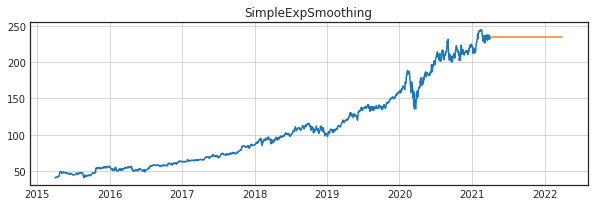

In [191]:
show_plot(data, forecast_ses, "SimpleExpSmoothing")

In [192]:
forecast_holt = _model_create(data, Holt, 365)
pd.DataFrame(forecast_holt.head(), columns = ['Close'])

,Close
2021-04-01 16:00:00,235.447688
2021-04-02 16:00:00,235.593710
2021-04-03 16:00:00,235.739732
2021-04-04 16:00:00,235.885755
2021-04-05 16:00:00,236.031777


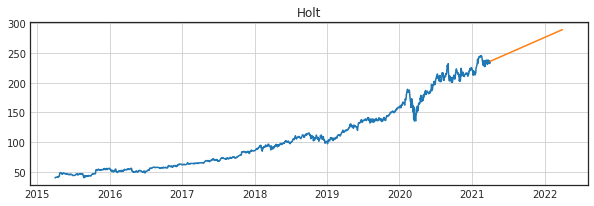

In [193]:
show_plot(data, forecast_holt, "Holt")

In [194]:
forecast_exs = _model_create(data, ExponentialSmoothing, 365)
pd.DataFrame(forecast_exs.head(), columns = ['Close'])

c:\Users\levan\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Close
2021-04-01 16:00:00,234.196388
2021-04-02 16:00:00,235.073831
2021-04-03 16:00:00,235.242146
2021-04-04 16:00:00,235.850651
2021-04-05 16:00:00,236.245574


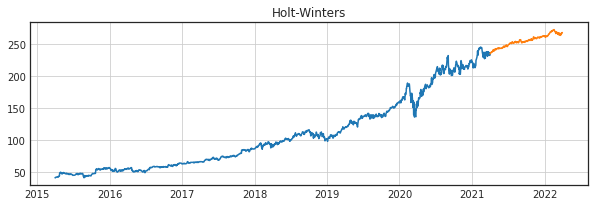

In [195]:
show_plot(data, forecast_exs, "Holt-Winters")